<a href="https://colab.research.google.com/github/skmerick/ifood/blob/main/Notebook/Aprendizagem_Nao_Supervisionada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - Parte 4 - Aprendizagem Não Supervisionada - Clusterização - Exercícios


--- 
<img align="center" width="150" src="https://logodownload.org/wp-content/uploads/2017/05/ifood-logo-0.png">



### Definição do Problema

O departamento de Marketing quer entender o comportamento dos clientes do iFood, para isso fez uma solicitação para o time de Ciência de Dados para criar modelos de Machine Learning para segmentar os clientes.

### Carregando o conjunto de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
data_dir = '/content/drive/MyDrive/datasets/ifood'
df_orders = pd.read_csv(os.path.join(data_dir, 'df_orders.csv'))

In [ ]:
df_orders.head(3)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,scheduled_creation_date_local,device_app_version,device_type,device_platform,payment_method,customer_state_label,customer_city,customer_district,customer_centroid_id,customer_has_plus,customer_seg_status_last_month,customer_seg_recency_bucket,customer_seg_frequency_bucket,customer_seg_merchant_offer_bucket,customer_seg_benefits_sensitivity_bucket,customer_seg_marlin_tag,customer_seg_gross_income_bucket,customer_seg_preferred_shift,frn_id,merchant_city,merchant_district,merchant_centroid_id,merchant_dish_type,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11T13:22:06.497Z,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,2019-12-11T13:22:06.497Z,9.29.1,MOBILE,ANDROID,CC_ONLINE,RN,PARNAMIRIM,NOVA PARNAMIRIM,-5.89-35.2,False,Active,1.0,5.0,5.0,Alta,NaN,6.0,NaN,43583,NATAL,PONTA NEGRA,-5.87-35.18,Comida Brasileira,2722.603906,0.0,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06T17:57:17.967Z,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,2019-11-06T17:57:17.967Z,webapp_6.2.0,SITE,DESKTOP,CC_ONLINE,PR,LONDRINA,Gleba Fazenda Palhano,-23.33-51.19,False,Active,1.0,4.0,5.0,Media,1. Marlin,6.0,NaN,533415,LONDRINA,Gleba Fazenda Palhano,-23.34-51.19,Lanches,1108.823183,1.0,0.0,1.0,7.0,1.0,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11T20:42:32.058Z,weekday dinner,2019-06-11T22:42:54.005Z,53.80,4.0,49.8,DELIVERY,False,2019-06-11T20:42:32.058Z,iOS_iFood_9.2.1,MOBILE,IOS,CC_ONLINE,SP,SAO PAULO,Jardim Santa Cruz (sacoma),-23.64-46.59,NaN,Active,1.0,5.0,5.0,Media,1. Marlin,6.0,5. Jantar,166370,SAO PAULO,Parque Bristol,-23.64-46.61,Comida Brasileira,1642.258522,0.0,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...


# Segmentação por Tipo de Comida (12 pontos)

**<span style="color:blue">(1 ponto)</span> `Q1`** Crie a ABT de segmentação por tipo de comida utilizando as colunas `customer_id` e `merchant_dish_type` e utilizando uma frequência normalizada para cada `customer_id`, em outras palavras, utilizando o percentual de gasto que ele teve em cada categoria de comida.

Salve o resultado na variável `abt_seg_tipo_comida`


In [ ]:
abt_seg_tipo_comida = pd.crosstab(df_orders['customer_id'], df_orders['merchant_dish_type'], normalize='index')
abt_seg_tipo_comida.head()

merchant_dish_type,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,Comida Alemã,Comida Asiática,Comida Brasileira,Comida Chinesa,Comida Contemporânea,Comida Francesa,Comida Indiana,Comida Italiana,Comida Japonesa,Comida Mediterrânea,Comida Mexicana,Comida Peruana,Comida Portuguesa,Comida Saudável,Comida Tailandesa,Comida Variada,Comida Árabe,Congelados,Congelados Fit,Conveniência,Coreana,Cozinha Rápida,Crepe,Doces & Bolos,Espanhola,Frangos,Frutos do Mar,Gaúcha,Hambúrguer,Lanches,Marmita,Mercado,Mineira,Nordestina,Padaria,Panqueca,Pastel,Peixes,Pizza,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d1765fe2ff6344dd423,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001a9f97d01d2696cf70c7657ee2d039388d691720ff99e92015c42775242f1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004720dc16aed1f98fd79f59736170e0d686199cd9ae5de6d8376365e4670f0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.285714,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006a32816a3af172048de7db87c97c4c8c7ad7e6385fab3c2f57be51a67efff,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00081913eb21cd12aecc831bda704f8c6482723b55e66424100d15959b0f9141,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
abt_seg_tipo_comida.shape

(30079, 57)

<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" /> &nbsp; **CHECKPOINT** - O DataFrame `abt_seg_tipo_comida` deverá conter exatamente `(30079, 57)`

**<span style="color:blue">(2 pontos)</span> `Q2`** Utilizando a biblioteca `yellowbrick` crie o gráfico do cotovelo para visualizar quantos clusters devemos utilizar no KMeans.

Os seguintes parâmetros devem ser considerados:
* `random_state=15`
* `k=(2, 21)`

Utilize a variável `abt_seg_tipo_comida` para testar com k-clusters.


In [ ]:
!pip install yellowbrick -U

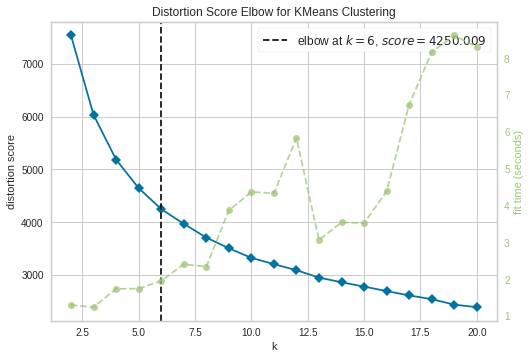

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 21), random_state=15)
visualizer.fit(abt_seg_tipo_comida)
visualizer.show()

**<span style="color:blue">(1 ponto)</span> `Q3`** Qual é a quantidade de cluster sugerida pela biblioteca `yellowbriks`? Você concorda com esse valor para k?

**<span style="color:blue">[RESPOSTA]:</span>**  Ele sugere k=6, concordo. Pois o Elbow justamente nos sugere o melhor numero de clusters de acordo com os parametros definidos.

**<span style="color:blue">(2 pontos)</span> `Q4`** Ajuste o KMeans com os seguintes parâmetros:

* `n_clusters=9`
* `random_state=15`

Após crei uma nova coluna no DF `abt_seg_tipo_comida` chamada `cluster_categorias` que deverá conter o número do cluster associado as características de cada linha.

In [ ]:
model = KMeans(n_clusters=9, random_state=15)
model.fit(abt_seg_tipo_comida)
abt_seg_tipo_comida['cluster_categorias'] = model.labels_
abt_seg_tipo_comida.head()

merchant_dish_type,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,Comida Alemã,Comida Asiática,Comida Brasileira,Comida Chinesa,Comida Contemporânea,Comida Francesa,Comida Indiana,Comida Italiana,Comida Japonesa,Comida Mediterrânea,Comida Mexicana,Comida Peruana,Comida Portuguesa,Comida Saudável,Comida Tailandesa,Comida Variada,Comida Árabe,Congelados,Congelados Fit,Conveniência,Coreana,Cozinha Rápida,Crepe,Doces & Bolos,Espanhola,Frangos,Frutos do Mar,Gaúcha,Hambúrguer,Lanches,Marmita,Mercado,Mineira,Nordestina,Padaria,Panqueca,Pastel,Peixes,Pizza,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba,cluster_categorias
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d1765fe2ff6344dd423,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
0001a9f97d01d2696cf70c7657ee2d039388d691720ff99e92015c42775242f1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
0004720dc16aed1f98fd79f59736170e0d686199cd9ae5de6d8376365e4670f0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.285714,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
0006a32816a3af172048de7db87c97c4c8c7ad7e6385fab3c2f57be51a67efff,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
00081913eb21cd12aecc831bda704f8c6482723b55e66424100d15959b0f9141,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


**<span style="color:blue">(2 pontos)</span> `Q5`** Faça a avaliação do ajuste do KMeans utilizando o Mapa de Calor.

O que podemos concluir?


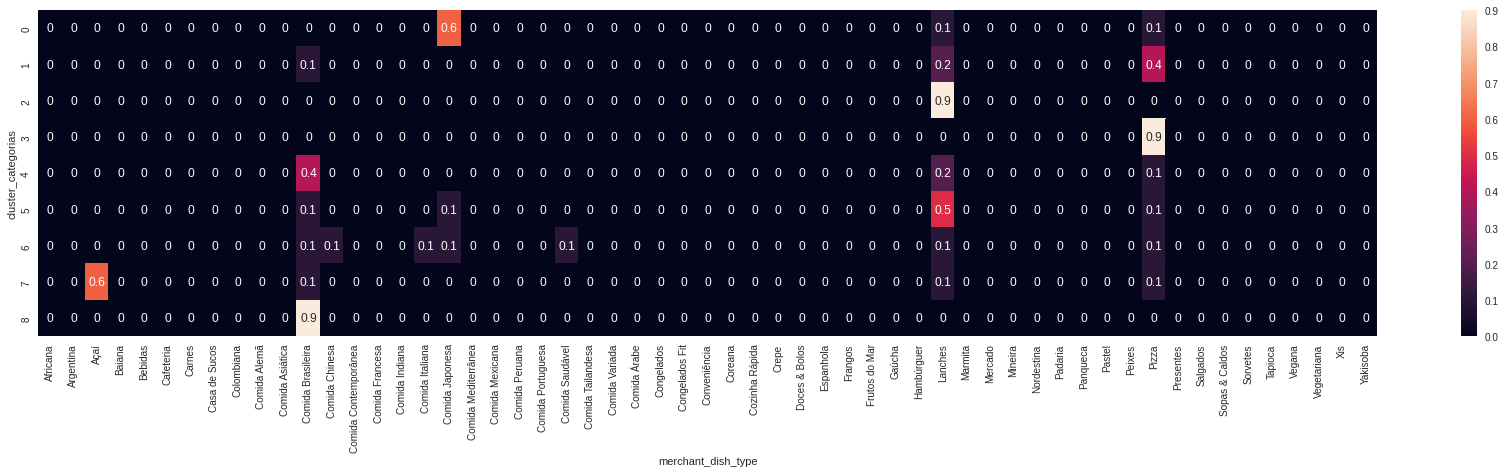

In [ ]:
fig, ax = plt.subplots(figsize=(30, 6))
sns.heatmap(abt_seg_tipo_comida.groupby('cluster_categorias').mean().round(1), annot=True)

**<span style="color:blue">[RESPOSTA]:</span>**  que dentre os 57 tipos de comida, podemos notar algumas poucas variaveis mais importantes. E notamos que há grande consumo de alguns alimentos em alguns clusters como o cluster 6 comida brasileira, cluster 2 lanches e cluster 4 pizza.

**<span style="color:blue">(4 pontos)</span> `Q6`** Utilize a técnica Surrougate Tree para selecionar as 9 variáveis mais importantes.

* Ajuste a Árvore de Decisão. Lembre-se de no fit remover a coluna `cluster_categorias` das features (colunas), uma vez que é isso que queremos identificar, sendo o nosso alvo. (1 ponto)
* Recupere as 9 features mais importantes. (1 ponto)
* Faça o mapa de calor para facilitar as conclusões sobre os grupos e quais variáveis impactam mais cada grupo gerado. (1 ponto)
* Faça uma análise do resultado obtido no mapa de calor. (1 ponto)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=15)
X = abt_seg_tipo_comida.drop(columns='cluster_categorias').copy()
clf.fit(X, abt_seg_tipo_comida['cluster_categorias'])

DecisionTreeClassifier(random_state=15)

In [ ]:
top_features = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False).head(9)
top_features

merchant_dish_type
Lanches              0.343334
Pizza                0.268372
Comida Brasileira    0.216700
Comida Japonesa      0.090604
Açaí                 0.049431
Comida Saudável      0.010343
Comida Chinesa       0.007351
Comida Árabe         0.001825
Comida Italiana      0.001646
dtype: float64

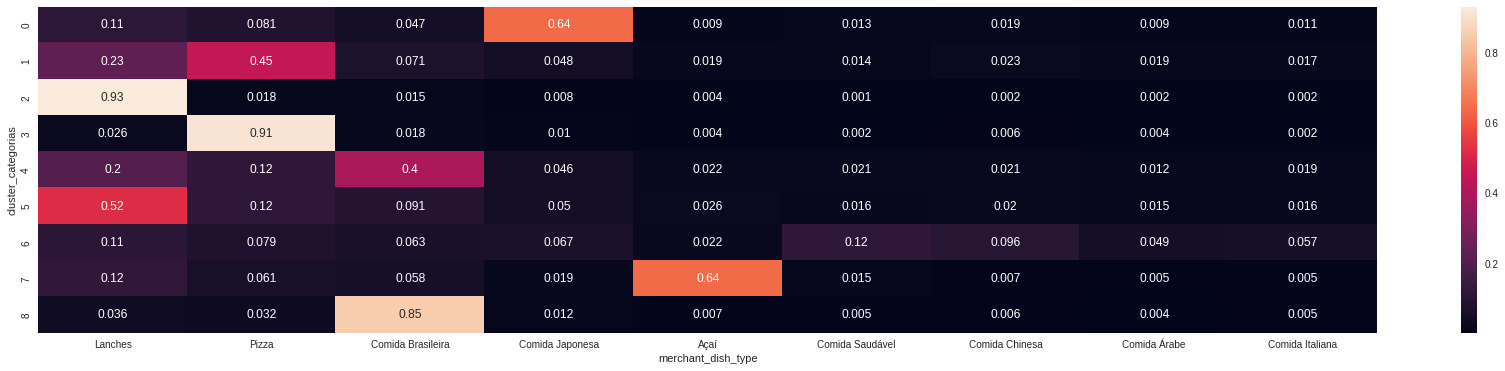

In [ ]:
fig, ax = plt.subplots(figsize=(30, 6))
sns.heatmap(abt_seg_tipo_comida.groupby('cluster_categorias')[top_features.index].mean().round(3), annot=True)

**<span style="color:blue">[RESPOSTA]:</span>** Podemos notar que as variaveis mais importantes são os lanches, pizza e comida brasileira. pois estão bem distribuidas entre os clusters.

# Segmentação por RFV (13 pontos)

**<span style="color:blue">(4 pontos)</span> `Q7`** Crei a ABT para a segmentação por RFV utilizando a base `df_orders` com as seguintes características:

* Faça o agrupamento pelo `customer_id`. (1 ponto)
* Aplicar a função de agregação `count` para `order_id` e o resultado deve ser salvo em uma nova coluna com o nome de `total_pedidos`. (1 ponto)
* Aplicar a função de agregação `sum` para `order_total` e o resultado deve ser salvo em uma nova coluna com o nome de `total_receita`. (1 ponto)
* Reinicie o index da estrutura criada e salve na variável `abt_rfv`. (1 ponto)



In [ ]:
abt_rfv = (
    df_orders
    .groupby('customer_id')
    .agg(
        total_pedidos = ('order_id', 'count'),
        total_receita = ('order_total', 'sum')
    ).reset_index()
) 
abt_rfv.head()

,customer_id,total_pedidos,total_receita
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,2,103.20
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,3,153.96


**<span style="color:blue">(1 ponto)</span> `Q8`** Faça o ranqueamento (rank) das colunas `total_pedidos` e `total_receita` com a opção `pct=True` e adicione o resultado no mesmo DF `abt_rfv`, sendo o nome da duas novas colunas como `rank_pct_pedidos` e `rank_pct_receita` respectivamente.

In [ ]:
abt_rfv['rank_pct_pedidos'] = abt_rfv.total_pedidos.rank(pct=True)
abt_rfv['rank_pct_receita'] = abt_rfv.total_receita.rank(pct=True)
abt_rfv.head()

,customer_id,total_pedidos,total_receita,rank_pct_pedidos,rank_pct_receita
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70,0.375096,0.363410
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18,0.375096,0.403404
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56,0.415090,0.430583
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,2,103.20,0.161990,0.168855
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,3,153.96,0.228349,0.231723


**<span style="color:blue">(1 pontos)</span> `Q9`** Utilizando a biblioteca `yellowbrick` crie o gráfica do cotovelo para visualizar quantos clusters devemos utilizar no KMeans na base `abt_rfv`.

Os seguintes parâmetros devem ser considerados:
* `random_state=15`
* `k=(2, 10)`

Utilize as features `rank_pct_pedidos` e `rank_pct_receita` do DF `abt_rfv` para testar com k-clusters.

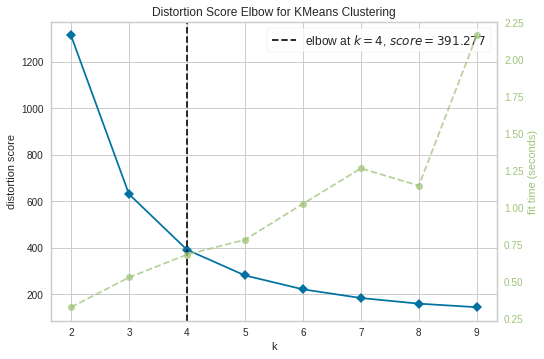

In [ ]:
X_abt_rfv = abt_rfv[['rank_pct_pedidos', 'rank_pct_receita']]
model = KMeans(random_state=15)
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(X_abt_rfv)
visualizer.show()

**<span style="color:blue">(1 ponto)</span> `Q10`** Ajuste o KMeans com os seguintes parâmetros:

* `n_clusters=4`
* `random_state=15`

Após crei uma nova coluna no DF `abt_rfv` chamada `cluster_fv` que deverá conter o número do cluster associado as características de cada linha.

In [ ]:
model = KMeans(n_clusters=4, random_state=15)
model.fit(X_abt_rfv)
abt_rfv['cluster_fv'] = model.labels_
abt_rfv.head()

,customer_id,total_pedidos,total_receita,rank_pct_pedidos,rank_pct_receita,cluster_fv
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70,0.375096,0.363410,3
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18,0.375096,0.403404,3
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56,0.415090,0.430583,3
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,2,103.20,0.161990,0.168855,1
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,3,153.96,0.228349,0.231723,1


**<span style="color:blue">(1 ponto)</span> `Q11`** Faça o plot do tipo `scatter` considerando os seguintes parâmetros:

`x='rank_pct_pedidos', y='rank_pct_receita', hue='cluster_fv', s=50, pallete='deep'`

Utilize a biblioteca `seaborn`.


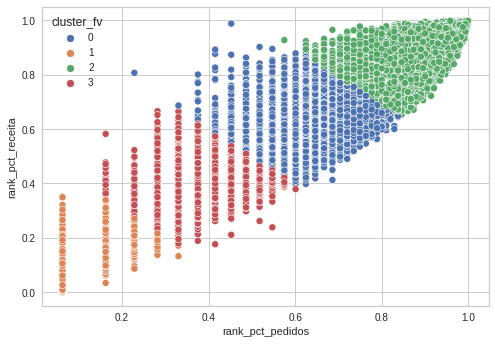

In [ ]:
sns.scatterplot(data=abt_rfv, x='rank_pct_pedidos', y='rank_pct_receita', hue='cluster_fv', s=50, palette='deep')

**<span style="color:blue">(2 pontos)</span> `Q12`** Faça um único plot dos dois gráficos criados anteriormente (mapa de calor e o plot do tipo `scatter`). Utilize as variáveis `abt_seg_tipo_comida` e `abt_rfv`.

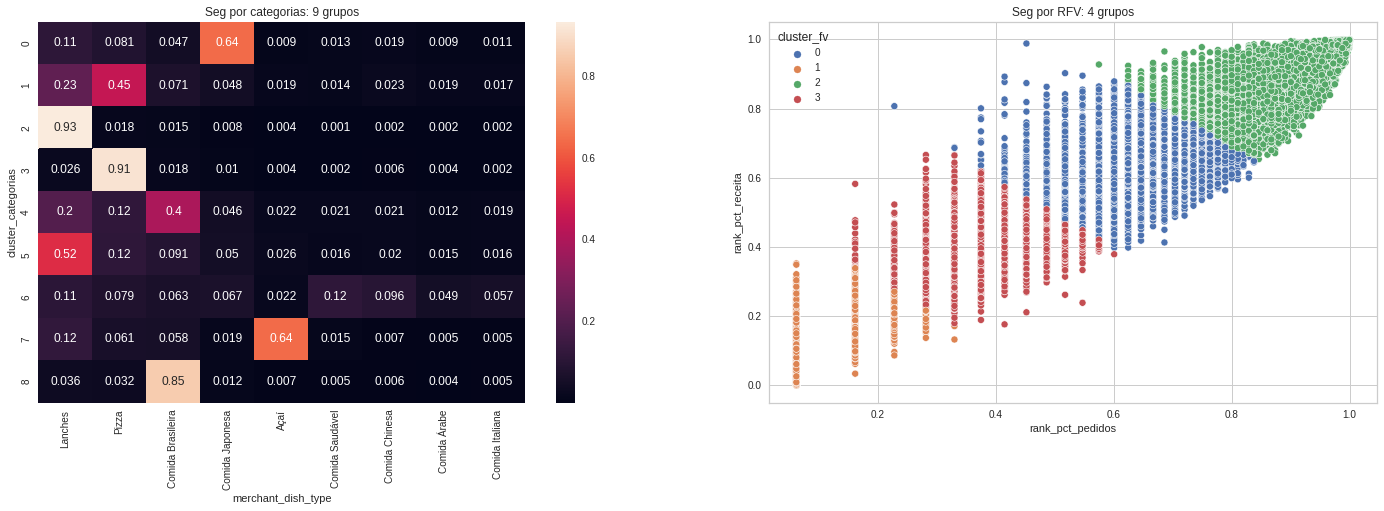

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24, 7))

ax[0].set_title('Seg por categorias: 9 grupos')
ax[1].set_title('Seg por RFV: 4 grupos')
sns.heatmap(abt_seg_tipo_comida.groupby(abt_seg_tipo_comida.cluster_categorias)[top_features.index].mean().round(3), annot=True, ax=ax[0])
sns.scatterplot(data=abt_rfv, x='rank_pct_pedidos', y='rank_pct_receita', hue='cluster_fv', s=50, palette='deep', ax=ax[1])

**<span style="color:blue">(1 ponto)</span> `Q13`** Faça a junção da `abt_seg_tipo_comida` com a `abt_rfv`. Lembre-se de reiniciar o indices da `abt_seg_tipo_comida` e utilize o seguintes parâmetros na junção (`merge`):

* `on='customer_id'`
* `how='left'`

Por fim, filtre apenas as colunas: `'customer_id', 'cluster_categorias', 'cluster_fv'`.

Salve o resultado na variável `resultado_segmentacao`.

In [ ]:
resultado_segmentacao = (
    abt_seg_tipo_comida
    .merge(abt_rfv, on='customer_id', how='left')
    .filter(['customer_id', 'cluster_categorias', 'cluster_fv'])
)
resultado_segmentacao.head()

,customer_id,cluster_categorias,cluster_fv
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,3,3
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,4,3
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,5,3
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,1,1
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,5,1


**<span style="color:blue">(1 ponto)</span> `Q14`** Faça o agrupamento pelo `cluster_categorias` e `cluster_fv` para visualizar a quantidade de clientes que existem em cada categoria gerada em relação aos grupos de frequência e venda.

* Utilize a função de agregação `count`
* Utilize a função `unstack` para facilitar a visualização
* Salve na variável `resultado_analise`.

Por fim, crie uma nova coluna, chamada `total`, nesse DF com a soma total de clientes dentro de cada cada grupo do `cluster_categorias`.

In [ ]:
resultado_analise = resultado_segmentacao.groupby(['cluster_categorias', 'cluster_fv'])['cluster_fv'].count().unstack()
resultado_analise['total'] = resultado_analise[0] + resultado_analise[1] + resultado_analise[2] + resultado_analise[3]
resultado_analise

cluster_fv,0,1,2,3,total
cluster_categorias,,,,,
0,388,556,326,445,1715
1,1517,561,1203,1274,4555
2,575,1931,292,967,3765
3,338,1247,123,579,2287
4,1295,589,1824,1062,4770
5,2011,614,1981,1840,6446
6,996,984,1498,821,4299
7,145,360,109,186,800
8,246,653,228,315,1442


**<span style="color:blue">(1 ponto)</span> `Q15`** Faça uma análise sobre os resultados obtidos nos exercícios Q12, Q13 e Q14.

Para facilitar, utilize a variável `resultado_segmentacao` para verificar a frequencia dos grupos gerados no `cluster_fv` dentro dos grupos do `cluster_categorias`.

**<span style="color:blue">[RESPOSTA]:</span>** Notamos que o cluster_fv 3 tem em grande concentração nas cluster_categorias 1,4 e 5. 
